In [5]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import pycatch22

## Signal simulation and distortion

array([<Axes: >, <Axes: >], dtype=object)

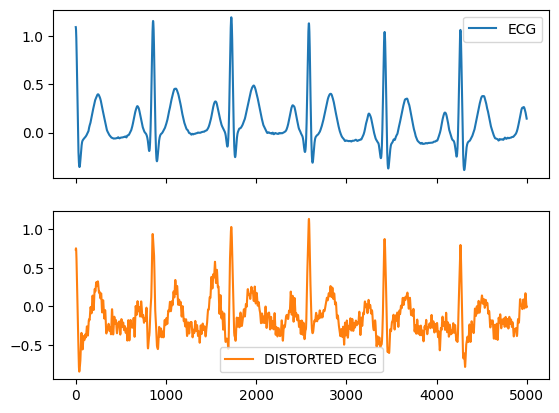

In [6]:
ecg = nk.ecg_simulate(duration=5, heart_rate=70)

ecg_series = pd.Series(ecg)
distorted_ecg = nk.signal_distort(ecg, noise_frequency=[0.2, 2, 10, 100], noise_amplitude=0.2, powerline_amplitude=0.2)

signal_data = pd.DataFrame({"ECG": ecg,
                            "DISTORTED ECG": distorted_ecg})

signal_data.plot(subplots=True)

## Cleaning using the neurokit library

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

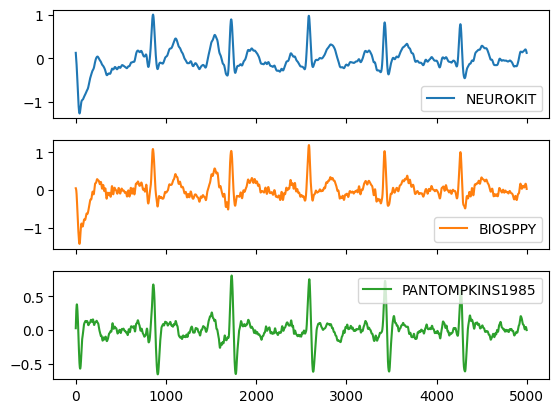

In [7]:
neurokit_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='neurokit')
biosppy_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='biosppy')
pantompkins1985_cleaned_ecg = nk.ecg_clean(distorted_ecg, method='pantompkins1985')

neurokit_cleaned_signal_data = pd.DataFrame({"NEUROKIT": neurokit_cleaned_ecg,
                                             "BIOSPPY": biosppy_cleaned_ecg,
                                             "PANTOMPKINS1985": pantompkins1985_cleaned_ecg})

neurokit_cleaned_signal_data.plot(subplots=True)

## Filtering using rolling average

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

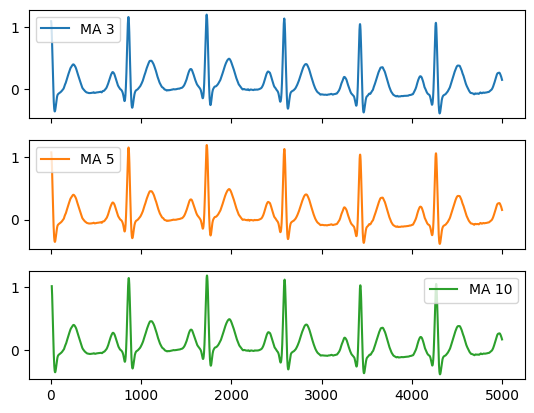

In [8]:
MA3_filtered_ecg = ecg_series.rolling(3).mean()
MA5_filtered_ecg = ecg_series.rolling(5).mean()
MA10_filtered_ecg = ecg_series.rolling(10).mean()

MA_filtered_signal = pd.DataFrame({"MA 3": MA3_filtered_ecg,
                                   "MA 5": MA5_filtered_ecg,
                                   "MA 10": MA10_filtered_ecg,})

MA_filtered_signal.plot(subplots=True)

## Decomposition

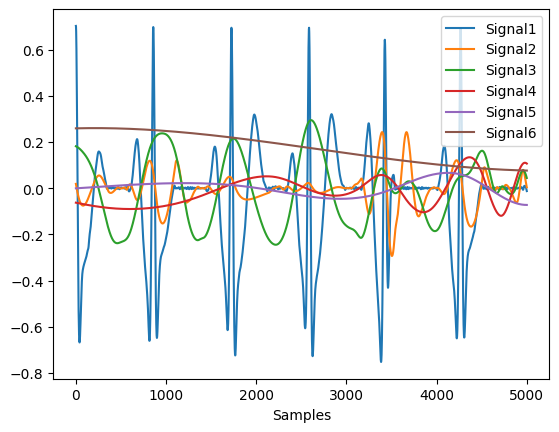

In [9]:
components = nk.signal_decompose(ecg, method='emd')
nk.signal_plot(components)